In [2]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1,1], [2, 1],[3,2]])
Y = np.array([1,1,1,2,2,2])


from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

print(clf_pf.predict([[-0.8, -1]]))

[1]
[1]


In [5]:
%matplotlib inline
from matplotlib import font_manager, rc
import warnings
warnings.simplefilter("ignore")
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)

In [7]:
X = np.array([[0, 1, 0 ,1],
            [1, 0, 1, 1],
            [0, 0, 0, 1],
            [1, 0 , 1, 0]])
y = np.array([0, 1, 0, 1])

C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


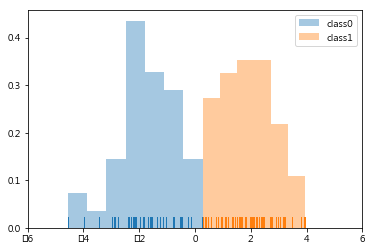

In [8]:
# label 별로 카운트 해보시오
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])

y = np.array([0,1,0,1])

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)

X0 =sp.stats.norm(-2, 1).rvs(40)
X1 = sp.stats.norm(+2, 1).rvs(60)
X = sp.hstack([X0, X1])[:, np.newaxis]
y0 = np.zeros(40)
y1 = np.ones(60)
y = np.hstack([y0, y1])


sns.distplot(X0, rug = True, kde=False, norm_hist=True, label = "class0")
sns.distplot(X1, rug = True, kde=False, norm_hist=True, label = "class1")

plt.legend()
plt.xlim(-6,6)
plt.show()

In [9]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X, y)

clf_norm.classes_
clf_norm.class_count_
clf_norm.class_prior_

array([0.4, 0.6])

C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


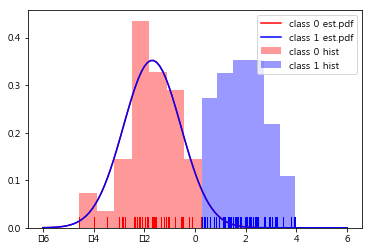

In [10]:
xx=np.linspace(-6,6,100)
p0 = sp.stats.norm(clf_norm.theta_[0],clf_norm.sigma_[0]).pdf(xx)
p1 = sp.stats.norm(clf_norm.theta_[1],clf_norm.theta_[1]).pdf(xx)
sns.distplot(X0, rug=True, kde=False, norm_hist=True, color="r", 
             label="class 0 hist")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, color="b", 
             label="class 1 hist")
plt.plot(xx, p0, c="r", label="class 0 est.pdf")
plt.plot(xx, p0, c="b", label="class 1 est.pdf")
plt.legend()
plt.show()

In [11]:
x_new = -1
clf_norm.predict_proba([[x_new]])
#우도
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_new)
px
#사전확률
p = px.flatten() * clf_norm.class_prior_
p
#사후확률
p / p.sum()

array([0.98327446, 0.01672554])

In [12]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model1 = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', MultinomialNB()),
    ])
model2 = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB()),
    ])
model3 = Pipeline([
        ('vect', TfidfVectorizer(stop_words="english")),
        ('clf', MultinomialNB()),
        ])
model4 = Pipeline([
        ('vect', TfidfVectorizer(stop_words="english",
                                 token_pattern=r"\b[a-z0-9_\-\.]+ [a-z][a-z0-9_\-\.]+\b")),
                                 ('clf', MultinomialNB()),
                                 ])

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

model2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words ="english")),
    ('clf', MultinomialNB()),
])

model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words ="english",
                            token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
    ('clf', MultinomialNB()),
])

In [84]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
# 데이터 생성
X, y = datasets.make_classification(n_samples =100000, n_features =20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.99, random_state=42)

Logistic:
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

Naive Bayes:
	Brier: 0.118
	Precision: 0.857
	Recall: 0.876
	F1: 0.867

Naive Bayes + Isotonic:
	Brier: 0.098
	Precision: 0.883
	Recall: 0.836
	F1: 0.859

Naive Bayes + Sigmoid:
	Brier: 0.109
	Precision: 0.861
	Recall: 0.871
	F1: 0.866

Logistic:
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

SVC:
	Brier: 0.163
	Precision: 0.872
	Recall: 0.852
	F1: 0.862

SVC + Isotonic:
	Brier: 0.100
	Precision: 0.853
	Recall: 0.878
	F1: 0.865

SVC + Sigmoid:
	Brier: 0.099
	Precision: 0.874
	Recall: 0.849
	F1: 0.861



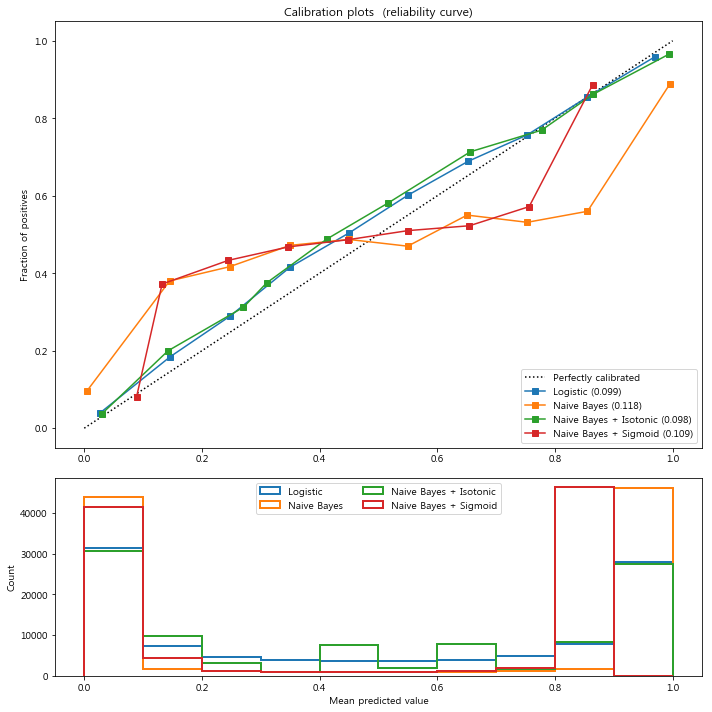

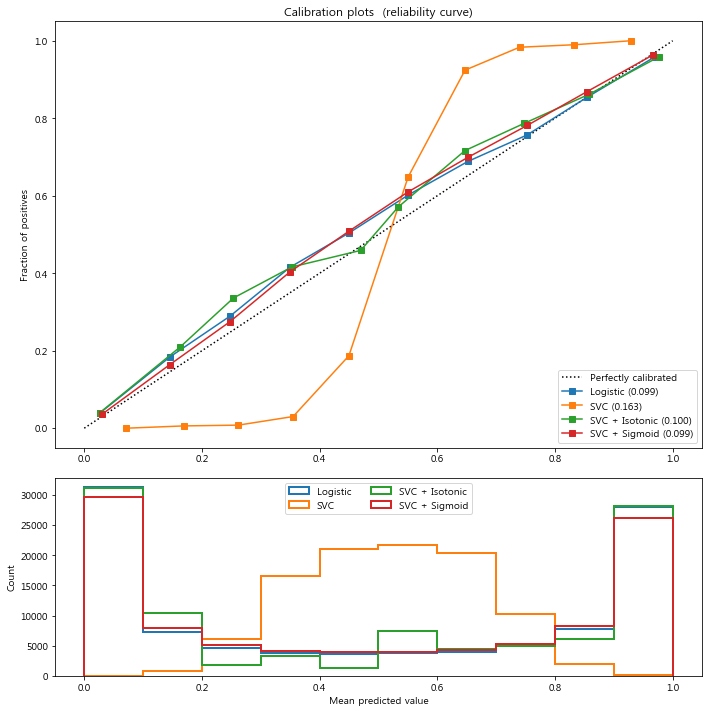

In [87]:
def plot_calibration_curve(est, name, fig_index):
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')
    sigmoid = CalibratedClassifierCV(est, cv=2, method= 'sigmoid')
    lr = LogisticRegression(C=1., solver = 'lbfgs')
    
    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(), "SVC", 2)

plt.show()

In [92]:
data.head()

,Survived,Pclass,Sex_cleaned,Age,SibSp,Parch,Fare,Embarked_cleaned
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [91]:
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

data = pd.read_csv("titanic_train.csv")
#범주화
data["Sex_cleaned"] = np.where(data["Sex"] == "male", 0,1)
data["Embarked_cleaned"] = np.where(data["Embarked"]=="S",0,
    np.where(data["Embarked"]=="C",1, np.where(data["Embarked"]=="Q",2,3)))
#결측치 처리
data=data[["Survived", "Pclass", "Sex_cleaned", "Age", "SibSp", "Parch", "Fare", "Embarked_cleaned"]].dropna(axis=0, how='any')

#데이터 분할
X_train, X_test= train_test_split(data, test_size=0.5, random_state=int(time.time()))
# 생존여부와 관련이 있는 변수를 선택하고 "Survived"를 종속변수로 하여 naive bayes 분석하시오
gnb = GaussianNB()
used_features = [
     "Pclass", "Sex_cleaned", "Age", "SibSp", "Parch", "Fare", "Embarked_cleaned"
]
gnb.fit(X_train[used_features].values, X_train["Survived"])
y_pred=gnb.predict(X_test[used_features])
print("총 {} , 잘못 분류된 것 : {}, 정 분류율 : {:05.2f}%".format(X_test.shape[0], (X_test["Survived"]!=y_pred).sum(), 
                                                      100*((X_test["Survived"] == y_pred).sum()/X_test.shape[0])))
# 운임(fare)와 Survived의 모델을 생성하고 예측해 보시오
    # 모델로부터 다음 값을 찾으시오
    # 운임과 survived와의 모델로부터 위의 운임평균과 표준편차를 구하시오 

#1) 생존자 운임 평균
mean_fare_survived = np.mean(X_train[X_train["Survived"] ==1]["Fare"])
std_fare_survived = np.std(X_train[X_train["Survived"] ==1]["Fare"])

#2 ) 생존확률과 사망확률
mean_survival = np.mean(X_train["Survived"])
mean_not_survival = 1- mean_survival

print("생존확률 = {:03.2f}%, 사망확률 = {:03.2f}%".format(100*mean_survival, 100*mean_not_survival))
#3)Fare와 survived의 NB모델화
gnb = GaussianNB()
used_features = [
        "Fare"]
gnb.fit(X_train[used_features].values, X_train["Survived"])
y_pred = gnb.predict(X_test[used_features])
print("총 {}, 잘못 분류된 것: {}, 정분류율: {:05.2f}%".format(X_test.shape[0],
      (X_test["Survived"] != y_pred).sum(), 
      100*((X_test["Survived"]==y_pred).sum()/X_test.shape[0])))
print("생존자 운임 표준편차: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("생존자 운임 평균: {:05.2f}".format(gnb.theta_[1][0]))

총 357 , 잘못 분류된 것 : 88, 정 분류율 : 75.35%
생존확률 = 40.62%, 사망확률 = 59.38%
총 357, 잘못 분류된 것: 124, 정분류율: 65.27%
생존자 운임 표준편차: 68.17
생존자 운임 평균: 48.59


# 문제
- 결측치 처리
- 잘못된 데이터 cleaning
- 범주화
- naive bayes 모델 생성 후 테스팅( GaussianNB() )

In [157]:
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
adult_df = pd.read_csv("adult.data", header = None, delimiter=" *, *", engine="python")
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                    'maritial_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                   'hours_per_week', 'native_country', 'income']

In [158]:
print(adult_df.shape)
print(adult_df.isnull().sum())
adult_df.dtypes

(32561, 15)
age                0
workclass          0
fnlwgt             0
education          0
education_num      0
maritial_status    0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64


age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
maritial_status    object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [160]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [161]:
adult_df = adult_df.drop(adult_df.loc[adult_df['workclass'] == '?', :].index)
adult_df = adult_df.drop(adult_df.loc[adult_df['occupation'] == '?', :].index)

In [162]:
adult_df['income'] = adult_df['income'].map(lambda x: 1 if (x in "<=50K") else 0 )
lst = [1, 3, 5, 6, 7, 8, 9, 13]
for column in adult_df.columns[lst]:
    dic = dict()
    idx = 0
    for i in list(set(adult_df[column])): 
        dic[i] = idx
        idx += 1

    adult_df[column] = adult_df[column].map(dic)
    print(dic)
adult_df.columns[lst]

{'Self-emp-not-inc': 0, 'Federal-gov': 1, 'Private': 2, 'State-gov': 3, 'Local-gov': 4, 'Self-emp-inc': 5, 'Without-pay': 6}
{'Preschool': 0, 'Prof-school': 1, 'Masters': 2, '11th': 3, 'Assoc-acdm': 4, '5th-6th': 5, 'Assoc-voc': 6, 'Some-college': 7, '1st-4th': 8, '9th': 9, '12th': 10, 'Bachelors': 11, 'Doctorate': 12, '7th-8th': 13, '10th': 14, 'HS-grad': 15}
{'Divorced': 0, 'Married-AF-spouse': 1, 'Married-spouse-absent': 2, 'Never-married': 3, 'Widowed': 4, 'Married-civ-spouse': 5, 'Separated': 6}
{'Prof-specialty': 0, 'Transport-moving': 1, 'Handlers-cleaners': 2, 'Tech-support': 3, 'Adm-clerical': 4, 'Farming-fishing': 5, 'Armed-Forces': 6, 'Protective-serv': 7, 'Other-service': 8, 'Craft-repair': 9, 'Priv-house-serv': 10, 'Sales': 11, 'Machine-op-inspct': 12, 'Exec-managerial': 13}
{'Own-child': 0, 'Other-relative': 1, 'Not-in-family': 2, 'Husband': 3, 'Unmarried': 4, 'Wife': 5}
{'Amer-Indian-Eskimo': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Other': 3, 'White': 4}
{'Male': 0, 'Fe

Index(['workclass', 'education', 'maritial_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [163]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,3,77516,11,13,3,4,2,4,0,2174,0,40,32,1
1,50,0,83311,11,13,5,13,3,4,0,0,0,13,32,1
2,38,2,215646,15,9,0,2,2,4,0,0,0,40,32,1
3,53,2,234721,3,7,5,2,3,1,0,0,0,40,32,1
4,28,2,338409,11,13,5,0,5,1,1,0,0,40,12,1


In [180]:
test = pd.read_csv("adult.test", header = None, delimiter=" *, *", engine="python")
test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                    'maritial_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                   'hours_per_week', 'native_country', 'income']
test.head()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 15 elements

In [175]:
X_train, X_test = train_test_split(adult_df, test_size=0.5, random_state=int(time.time()))
gnb = GaussianNB()
gnb.fit(X_train.values, X_train["income"])
y_pred = gnb.predict(X_test)
print("총 {} , 잘못 분류된 것 : {}, 정 분류율 : {:05.2f}%".format(X_test.shape[0], (X_test["income"]!=y_pred).sum(), 
                                                      100*((X_test["income"] == y_pred).sum()/X_test.shape[0])))

mean_income_education = np.mean(X_train[X_train["income"] ==1]["education_num"])
std_income_education = np.std(X_train[X_train["income"] ==1]["education_num"])

rich = np.mean(X_train["income"])
not_rich = 1- rich
print("부자 = {:03.2f}%, 거지 = {:03.2f}%".format(100*rich, 100 * not_rich))

gnb = GaussianNB()
used_features = ["education_num"]
gnb.fit(X_train[used_features].values, X_train["income"])
y_pred = gnb.predict(X_test)
print("총 {}, 잘못 분류된 것: {}, 정분류율: {:05.2f}%".format(X_test.shape[0],
      (X_test["income"] != y_pred).sum(), 
      100*((X_test["income"]==y_pred).sum()/X_test.shape[0])))
print("교육 임금 표준편차: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("교육 임금 평균: {:05.2f}".format(gnb.theta_[1][0]))

총 15359 , 잘못 분류된 것 : 3242, 정 분류율 : 78.89%
부자 = 74.93%, 거지 = 25.07%
총 15359, 잘못 분류된 것: 3800, 정분류율: 75.26%
교육 임금 표준편차: 02.44
교육 임금 평균: 09.64
